In [121]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib notebook 
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

In [122]:
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
train_data.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [123]:
train_data.shape

(2000, 21)

In [124]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [125]:
train_data.describe()
# Basic learning on my dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<IPython.core.display.Javascript object>


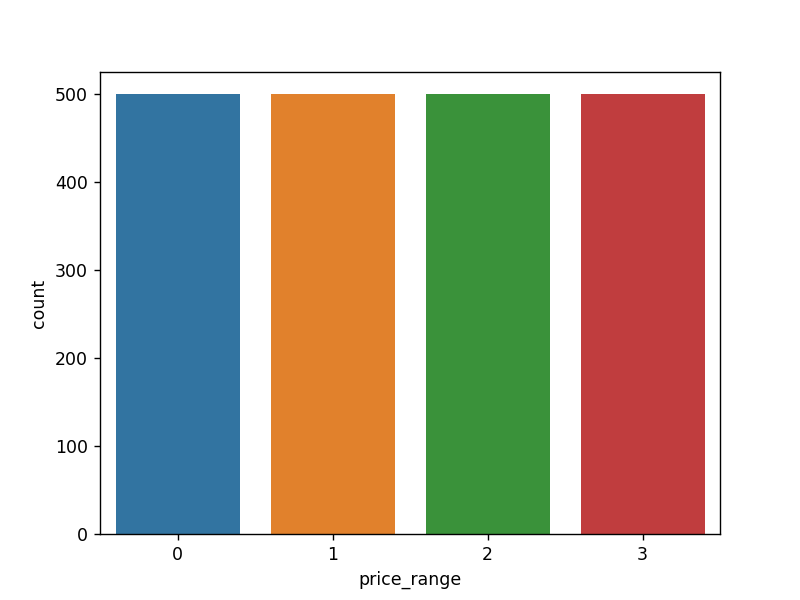

In [126]:
sns.countplot(x = "price_range", data = train_data)

In [127]:
train_data.groupby(['price_range']).mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


In [128]:
# It seems that the features: pc, battery power, ram and wifi effect the most (more or less rising). 

In [129]:
# We can also see that between low price (0) and high price (3) there is the most significiant difference, while 1 and 2 are quite similar. 

<IPython.core.display.Javascript object>


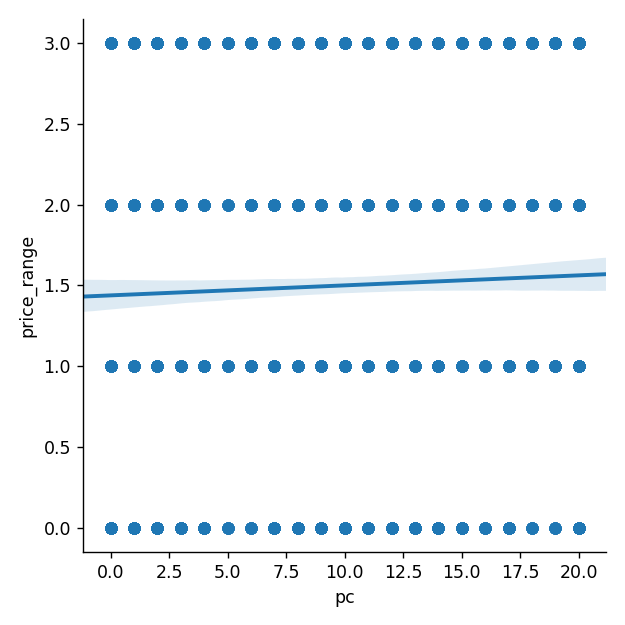

In [130]:
sns.lmplot("pc","price_range",train_data)

In [93]:
sns.lmplot("battery_power","price_range",train_data)

<IPython.core.display.Javascript object>

In [94]:
sns.boxplot(x="price_range", y="battery_power", data=train_data)

In [95]:
low_cost = train_data[train_data["price_range"] == 0] 
medium_cost = train_data[train_data["price_range"] == 1]
high_cost = train_data[train_data["price_range"] == 2]
very_high_cost = train_data[train_data["price_range"] == 3]

low_cost.ram.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "green", label = "low cost")
medium_cost.ram.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", label = "medium cost")
high_cost.ram.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "blue", label = "high cost")
very_high_cost.ram.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "yellow", label = "very high cost")

plt.xlabel('RAM')             
plt.legend()
plt.show()

In [96]:
sns.jointplot(x='ram',y='price_range',data=train_data,color='red',kind='kde')

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize= (8,7))
sns.barplot(x= train_data['price_range'], y= train_data['wifi'])
plt.xlabel('Price Range')
plt.ylabel('Wifi')
plt.title('Price Range vs Wifi')
plt.show()

<IPython.core.display.Javascript object>

In [98]:
sns.pointplot(y="int_memory", x="price_range", data=train_data)

In [99]:
plt.figure(figsize=(10,6))
train_data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
train_data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'MegaPixels')

In [100]:
train_data.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [101]:
plt.title('Has bluetooth?')
labels = 'Yes', 'No'
sizes=train_data['blue'].value_counts().values
#sizes = [990, 1010]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.show()

<IPython.core.display.Javascript object>

In [102]:
sns.countplot(x='blue', data=train_data, hue='price_range')
plt.title('Price Range/ Bluetooth')
#ax.set(ylim=(0,350))

Text(0.5, 1.0, 'Price Range/ Bluetooth')

Train/ Test Split

In [103]:
X = train_data.drop('price_range',axis=1)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [104]:
y = train_data['price_range']
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [105]:
#test_data= pd.read_csv('test_mobilePrice.csv', encoding= 'ISO-8859-1')
#test_data.head()

In [106]:
#print(test_data.shape)
#test_data.isnull().sum()

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [108]:
print(X.shape)
print(y.shape)
print(y_train)

(2000, 20)
(2000,)
61      0
853     0
680     3
455     2
130     3
       ..
1599    3
1862    0
1361    0
1547    2
863     0
Name: price_range, Length: 1340, dtype: int64


In [109]:
from sklearn.model_selection import cross_val_score

Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [111]:
n_scores = []
for n in list(range(1,60)):
    rfc = RandomForestClassifier(n_estimators=n) #, max_depth=5,random_state=1,n_jobs=-1
    rfc.fit(X_train, y_train)
    n_scores.append(rfc.score(X_test,y_test))

In [112]:
plt.plot(list(range(1,60)), n_scores)
plt.xlabel('n_estimators value')
plt.ylabel('SCORE')
plt.show()

In [113]:
n_scores = []
for n in list(range(50,200)):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, y_train)
    n_scores.append(rfc.score(X_test,y_test))
    
plt.plot(list(range(50,200)), n_scores)
plt.xlabel('n_estimators value')
plt.ylabel('SCORE')
plt.show()

In [114]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=199,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
rfc.score(X_train,y_train)

1.0

In [131]:
rfc.score(X_test,y_test)

0.8636363636363636

In [132]:
score = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(score)
print(score.mean())

[0.9   0.865 0.92  0.875 0.895 0.92  0.895 0.875 0.84  0.885]
0.8869999999999999


In [133]:
# The best model for my dataset: KNN !

In [134]:
predicted_price=rfc.predict(X_test)

In [135]:
predicted_price

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 2, 3, 3, 1, 0, 1, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 1, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 1, 1, 1, 3, 1, 0, 3, 3, 3, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 3, 0, 2, 2, 1, 3, 0, 0, 0, 1, 1, 3, 3, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 1, 2, 1, 0, 1, 3, 3, 1, 2, 0, 3, 1, 0, 2, 3, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2, 0, 1, 2,
       1, 3, 0, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 2, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0, 2, 2, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 3, 1, 0, 1, 3,